Importing the Dependencies

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.dataset

In [4]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [5]:
type(X_train)

numpy.ndarray

In [6]:
#shape of the numpy array
print((X_train.shape,Y_train.shape,X_test.shape,Y_test.shape))

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


Training dat=60k images
Test data=10k images
Image dimensions-->28*28
Grayscale Image-->1 Channel

In [7]:
#printing the 10th index
print(X_train[10])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


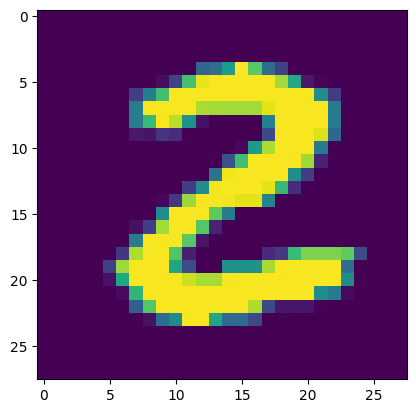

2


In [9]:
#displaying the image
plt.imshow(X_train[25])
plt.show()

#print the correspnding label
print(Y_train[25])


Image Labels


In [10]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [11]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

0-1 00000000
1label-010000000 this is One hot encoding

All the images have the same dimensions in this dataset,if not, we have resize all the images to a common dimesion

In [12]:
#scaling the values
X_train=X_train/255
X_test=X_test/255

0/255=0
255/255=1 
Here the highest value is 1 and lowest value is 0 and all other values will lies between 0-1.

In [13]:
#printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [14]:
#setting up the layers of the neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu' ),
    keras.layers.Dense(50, activation='relu' ),
    keras.layers.Dense(10,activation='sigmoid') 
])

In [15]:
#compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
#Training the Neural Network
model.fit( X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2978 - accuracy: 0.9158
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1407 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1029 - accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0832 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0686 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0587 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0460 - accuracy: 0.9847
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0380 - accuracy: 0.9874
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.035

Training data accuracy=98.7%

Accuracy on Test data:

In [17]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.0979 - accuracy: 0.9735
0.9735000133514404


Test data accuracy=97.5%

In [18]:
print(X_test.shape)

(10000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

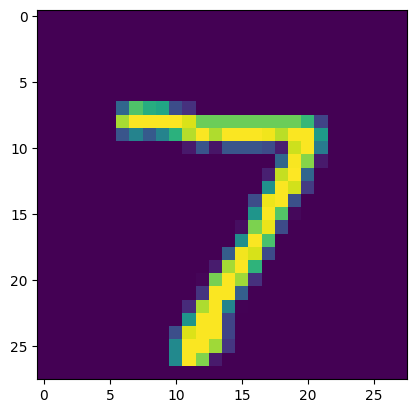

In [19]:
#first data point is X_test
plt.imshow(X_test[0])
plt.show

In [20]:
#print true label for this value
print(Y_test[0])

7


In [21]:
Y_pred=model.predict(X_test)
print(Y_pred.shape)

313/313 [==============================] - 1s 1ms/step
(10000, 10)


In [22]:
print(Y_pred[0])

[9.6548680e-04 2.0551084e-01 6.2875611e-01 9.9078727e-01 2.3972041e-05
 6.8724910e-03 2.9920646e-09 9.9999774e-01 2.3100384e-01 2.3359124e-01]


model.predict() gives the prediction probability of each class for that particular data point

In [23]:
#converting the prediction probabilities to class labels

label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [24]:
#converting the prediction probabilities to class labels for all test data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 8, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [25]:
print(Y_pred)

[[9.6548680e-04 2.0551084e-01 6.2875611e-01 ... 9.9999774e-01
  2.3100384e-01 2.3359124e-01]
 [2.0084200e-02 9.1364771e-01 9.9999988e-01 ... 9.1085534e-10
  1.6415766e-01 8.5367896e-10]
 [4.8425249e-03 9.9959975e-01 3.6319360e-01 ... 5.1471591e-01
  6.3031638e-01 3.5342115e-03]
 ...
 [1.7476855e-06 1.1192365e-05 1.6699607e-05 ... 6.4496195e-01
  3.2284066e-02 9.9884343e-01]
 [2.1373140e-04 9.2009592e-05 2.3864790e-05 ... 2.4739963e-03
  9.9097991e-01 1.3758409e-05]
 [4.8073655e-01 4.0652236e-13 1.7406149e-02 ... 1.3997814e-13
  2.0581988e-01 4.1481017e-06]]


Y_test-->True Labels
Y_pred_labels--> represents predicted labels the value predicted by neural network

COnfusion Matrix


In [26]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 971    0    0    1    0    2    1    1    3    1]
 [   0 1128    4    0    0    0    1    0    2    0]
 [   5    1 1002    4    2    3    3    6    6    0]
 [   0    0    3  980    0   17    0    4    3    3]
 [   0    0    4    1  955    4    6    3    0    9]
 [   2    0    0    6    1  874    3    1    3    2]
 [   3    2    0    1    4    8  938    0    2    0]
 [   1    3   12    3    1    0    0 1001    2    5]
 [   5    1    4    9    5   14    3    2  926    5]
 [   0    2    0    8   21    5    0   10    4  959]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

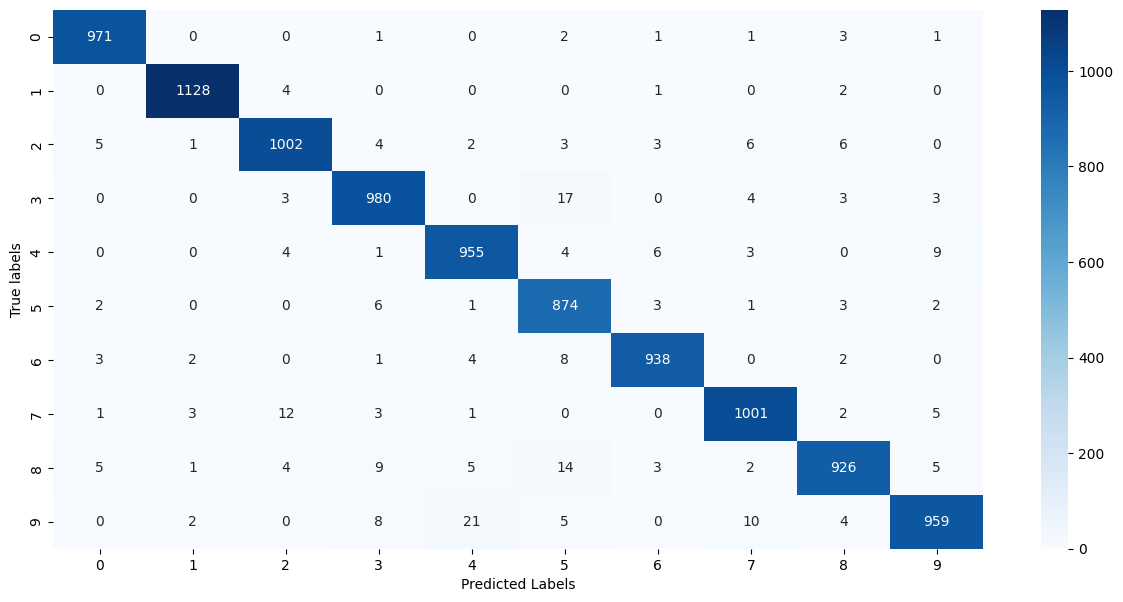

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted Labels')

Building a Predictive System


In [28]:
import cv2
input_image_path="MNIST_digit.png"
input_image=cv2.imread(input_image_path)
type(input_image)

numpy.ndarray

In [29]:
test_image=cv2.imshow('Window',input_image)
cv2.waitKey(0)



-1

In [30]:
input_image.shape


(318, 318, 3)

COnverting RGB image TO GRAY SCale

In [31]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
grayscale.shape

(318, 318)

Resizing the image to original size of (28,28)

In [32]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [33]:
input_image_resize.shape

(28, 28)

In [34]:
import cv2
cv2.imshow('Window',input_image_resize)
cv2.waitKey(0)

-1

In [35]:
# input_image_resize=input_image/255
# print(input_image_resize.shape)

In [36]:
type(input_image_resize)


numpy.ndarray

In [37]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [38]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 257ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 1. 1.]]


In [39]:
input_pred_label=np.argmax(input_prediction)

In [40]:
print(input_pred_label)

3


Predictive System


In [41]:
input_image_path=input('Path of the image to be predicted:')
input_image=cv2.imread(input_image_path)
cv2.imshow('Window',input_image_resize)
cv2.waitKey(0)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print('The Handwritten Digit is recognized as',input_pred_label)


1/1 [==============================] - 0s 25ms/step
The Handwritten Digit is recognized as 3
